# Chi-square menggunakan R

In [3]:
%load_ext rpy2.ipython

In [6]:
 %%R
 data_frame <- read.csv("https://goo.gl/j6lRXD")

In [22]:
%%R
data_frame

     id   treatment  improvement
1     1     treated     improved
2     2     treated     improved
3     3 not-treated     improved
4     4     treated     improved
5     5     treated not-improved
6     6     treated not-improved
7     7 not-treated not-improved
8     8     treated not-improved
9     9 not-treated     improved
10   10     treated     improved
11   11 not-treated     improved
12   12 not-treated not-improved
13   13 not-treated not-improved
14   14 not-treated not-improved
15   15 not-treated     improved
16   16 not-treated     improved
17   17     treated     improved
18   18     treated     improved
19   19 not-treated not-improved
20   20 not-treated not-improved
21   21     treated not-improved
22   22 not-treated not-improved
23   23     treated not-improved
24   24 not-treated     improved
25   25     treated     improved
26   26     treated     improved
27   27 not-treated not-improved
28   28 not-treated     improved
29   29     treated not-improved
30   30   

In [7]:
%%R
table(data_frame$treatment, data_frame$improvement)

             
              improved not-improved
  not-treated       26           29
  treated           35           15


In [8]:
%%R 
chisq.test(data_frame$treatment, data_frame$improvement, correct=FALSE)


	Pearson's Chi-squared test

data:  data_frame$treatment and data_frame$improvement
X-squared = 5.5569, df = 1, p-value = 0.01841



## Kesimpulan
Berdasarkan hasil  nilai chi-square hitung 5,5569. Kita telah mendapatkan p-Value lebih kecil dari tingkat signifikansi 0,05, sehingga  menolak hipotesis nol (null hypothesis ) dan  menyimpulkan bahwa kedua variabel tersebut adalah saling terkait (dependent)

In [9]:
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

In [10]:
from rpy2.robjects.packages import importr
utils = importr('utils')

dataf = utils.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/'
                       'master/notebooks/data/california_cities.csv')

In [11]:
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

In [12]:
dataf

,,X,city,latd,longd,...,area_water_km2,area_water_percent
0,1,0,Adelanto,34.57611111111112,-117.43277777777779,...,0.046,0.03
1,2,1,AgouraHills,34.15333333333333,-118.76166666666667,...,0.076,0.37
2,3,2,Alameda,37.75611111111111,-122.27444444444444,...,31.983,53.79
3,4,3,Albany,37.886944444444445,-122.29777777777778,...,9.524,67.28
4,5,4,Alhambra,34.081944444444446,-118.135,...,0.003,0.01
5,6,5,AlisoViejo,33.575,-117.72555555555556,...,0.0,0.0
6,7,6,Alturas,41.48722222222222,-120.5425,...,0.036000000000000004,0.57
7,8,7,AmadorCity,38.419444444444444,-120.82416666666666,...,0.0,0.0
...,...,...,...,...,...,...,...,...
480,481,480,Yucaipa,34.030277777777776,-117.04861111111111,...,0.013000000000000001,0.02


In [13]:
%load_ext rmagic

/usr/local/lib/python3.7/dist-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


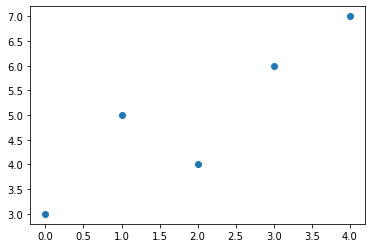

In [14]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])
plt.scatter(X, Y)

In [15]:
%Rpush X Y
%R lm(Y~X)$coef

array([3.2, 0.9])

In [16]:
Xr = X - X.mean(); Yr = Y - Y.mean()
slope = (Xr*Yr).sum() / (Xr**2).sum()
intercept = Y.mean() - X.mean() * slope
(intercept, slope)

(3.2, 0.9)

In [21]:
%R resid(lm(Y~X)); coef(lm(X~Y))

array([-2.5,  0.9])